# Diesel characterization of molecules

In [ ]:
# Install RDKit.
%%capture
!pip install rdkit

In [ ]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import os
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors
print('RDKit version: ', rdkit.__version__)

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
rdkit.RDLogger.DisableLog('rdApp.*')  # Suppress RDKit error messages
import pandas as pd

RDKit version:  2025.03.5


In [ ]:
os.chdir("/content/")

file_name = 'smiles-diesel.txt'  # fazer o upload do arq TXT na pasta 'content' do Colab antes de tudo

In [ ]:
df = pd.read_csv(file_name, header=None)
display(df.head())

,0
0,CCCCCC1CCCNC1C(C)C
1,CCCCCCCC1(CC)SCCS1
2,CCCCCCC(CC(C)C)n1ccnc1
3,CCCCC(CC(C)C)n1ccnc1
4,CCCCC1CCC(CCC(C)C)NC1


In [ ]:
df.rename(columns={0: 'SMILES'}, inplace=True)
display(df.head())

,SMILES
0,CCCCCC1CCCNC1C(C)C
1,CCCCCCCC1(CC)SCCS1
2,CCCCCCC(CC(C)C)n1ccnc1
3,CCCCC(CC(C)C)n1ccnc1
4,CCCCC1CCC(CCC(C)C)NC1


In [ ]:
# Creating molecular object from Smiles

PandasTools.AddMoleculeColumnToFrame(df,'SMILES','mol')

,SMILES,mol
0,CCCCCC1CCCNC1C(C)C,
1,CCCCCCCC1(CC)SCCS1,
2,CCCCCCC(CC(C)C)n1ccnc1,
3,CCCCC(CC(C)C)n1ccnc1,
4,CCCCC1CCC(CCC(C)C)NC1,
...,...,...
256,CCC(C)c1nc(C(C)C)c[nH]1,
257,CCCC1(CC2CCC(C(C)C)NC2)CCCC1,
258,CCCCCC1(CC(C)C)CCCCC1,
259,CCC1CCC(C)C2(CCCCC2)C1,

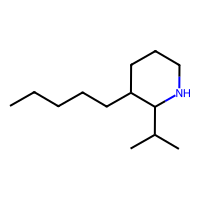
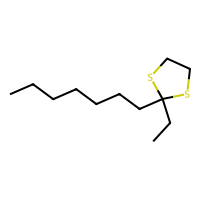
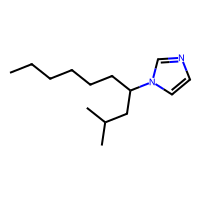
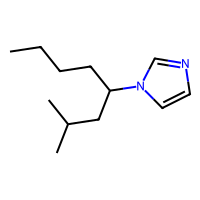
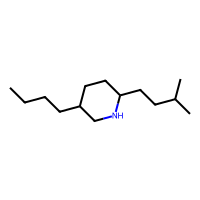
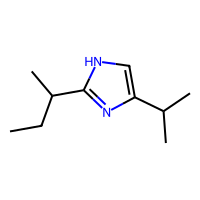
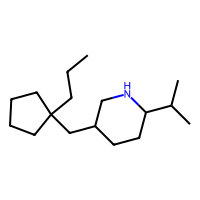
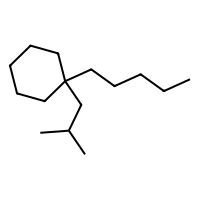
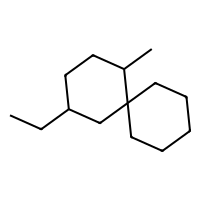
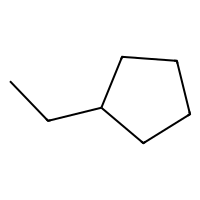

In [ ]:
df

## Calculate number of carbon atoms



In [ ]:
num_carbon_atoms_list = []
for mol in df['mol']:
    if mol is not None:
        num_carbon_atoms = sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 6)
        num_carbon_atoms_list.append(num_carbon_atoms)
    else:
        num_carbon_atoms_list.append(None)

In [ ]:
df['num_carbon_atoms'] = num_carbon_atoms_list
display(df.head())

,SMILES,mol,num_carbon_atoms
0,CCCCCC1CCCNC1C(C)C,<rdkit.Chem.rdchem.Mol object at 0x786b903a98c0>,13
1,CCCCCCCC1(CC)SCCS1,<rdkit.Chem.rdchem.Mol object at 0x786b903aa810>,12
2,CCCCCCC(CC(C)C)n1ccnc1,<rdkit.Chem.rdchem.Mol object at 0x786b903abdf0>,14
3,CCCCC(CC(C)C)n1ccnc1,<rdkit.Chem.rdchem.Mol object at 0x786b903aaab0>,12
4,CCCCC1CCC(CCC(C)C)NC1,<rdkit.Chem.rdchem.Mol object at 0x786b903ab4c0>,14


## Calculate molecular weight

In [ ]:
molecular_weight_list = []
for mol in df['mol']:
    if mol is not None:
        molecular_weight = Descriptors.MolWt(mol)
        molecular_weight_list.append(molecular_weight)
    else:
        molecular_weight_list.append(None)

In [ ]:
df['molecular_weight'] = molecular_weight_list
display(df.head())

,SMILES,mol,num_carbon_atoms,molecular_weight
0,CCCCCC1CCCNC1C(C)C,<rdkit.Chem.rdchem.Mol object at 0x786b903a98c0>,13,197.366
1,CCCCCCCC1(CC)SCCS1,<rdkit.Chem.rdchem.Mol object at 0x786b903aa810>,12,232.458
2,CCCCCCC(CC(C)C)n1ccnc1,<rdkit.Chem.rdchem.Mol object at 0x786b903abdf0>,14,222.376
3,CCCCC(CC(C)C)n1ccnc1,<rdkit.Chem.rdchem.Mol object at 0x786b903aaab0>,12,194.322
4,CCCCC1CCC(CCC(C)C)NC1,<rdkit.Chem.rdchem.Mol object at 0x786b903ab4c0>,14,211.393


## Display the updated dataframe

,SMILES,mol,num_carbon_atoms,molecular_weight
0,CCCCCC1CCCNC1C(C)C,,13,197.366
1,CCCCCCCC1(CC)SCCS1,,12,232.458
2,CCCCCCC(CC(C)C)n1ccnc1,,14,222.376
3,CCCCC(CC(C)C)n1ccnc1,,12,194.322
4,CCCCC1CCC(CCC(C)C)NC1,,14,211.393
...,...,...,...,...
256,CCC(C)c1nc(C(C)C)c[nH]1,,10,166.268
257,CCCC1(CC2CCC(C(C)C)NC2)CCCC1,,17,251.458
258,CCCCCC1(CC(C)C)CCCCC1,,15,210.405
259,CCC1CCC(C)C2(CCCCC2)C1,,14,194.362

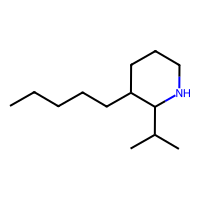
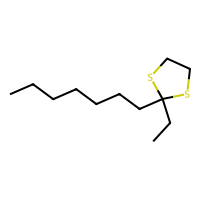
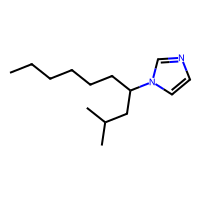
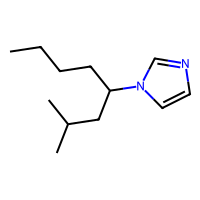
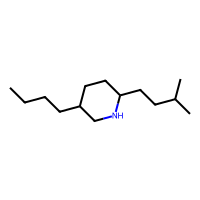
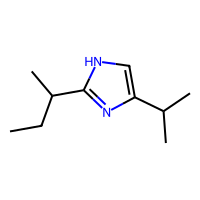
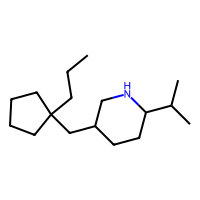
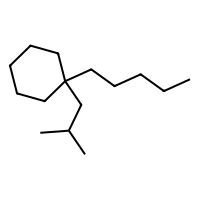
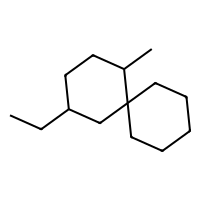
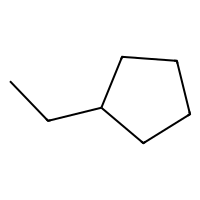

In [ ]:
display(df)

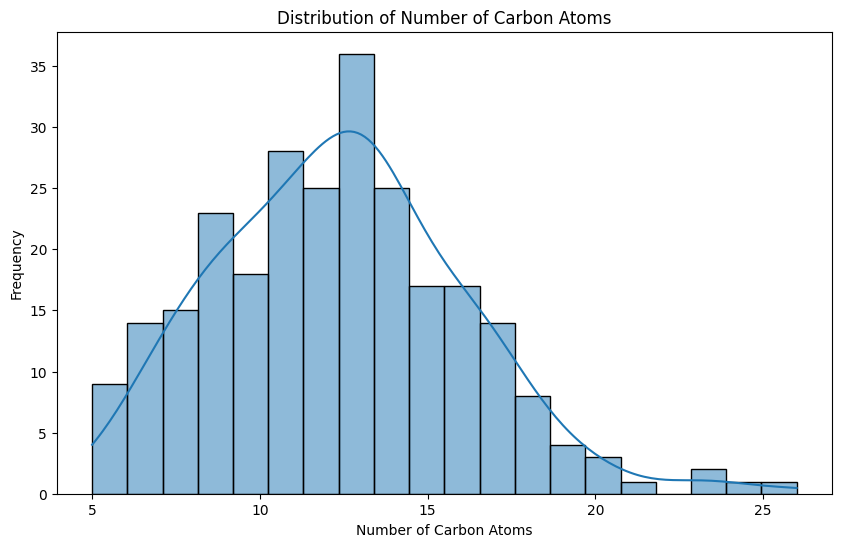

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['num_carbon_atoms'], bins=20, kde=True)
plt.title('Distribution of Number of Carbon Atoms')
plt.xlabel('Number of Carbon Atoms')
plt.ylabel('Frequency')
plt.show()

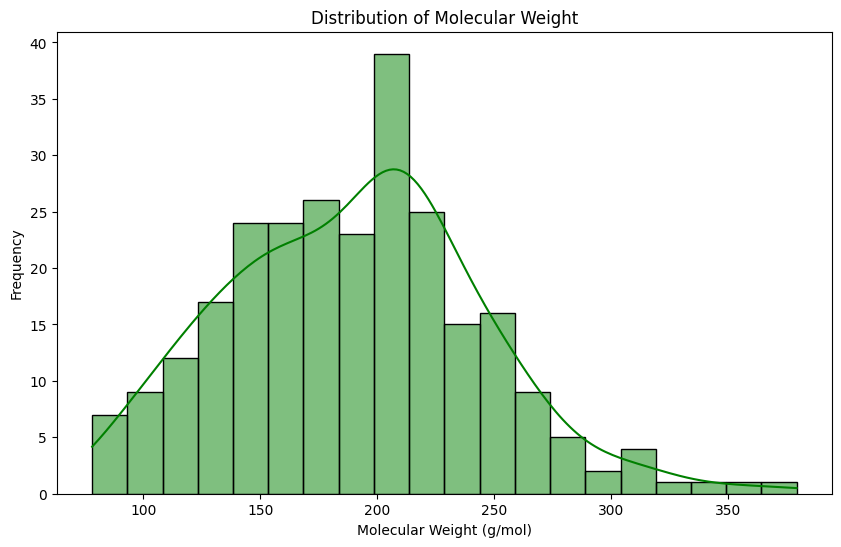

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['molecular_weight'], bins=20, kde=True, color='green')
plt.title('Distribution of Molecular Weight')
plt.xlabel('Molecular Weight (g/mol)')
plt.ylabel('Frequency')
plt.show()

## Define a function to check for aromaticity

Create a function that takes an RDKit molecule object as input and returns 'Aromatic' if the molecule contains at least one aromatic ring, and 'Aliphatic' otherwise.


In [ ]:
def classify_molecule_aromaticity(mol):
    """
    Classifies a molecule as 'Aromatic' or 'Aliphatic' based on the presence of aromatic atoms.

    Args:
        mol: RDKit molecule object.

    Returns:
        'Aromatic' if the molecule contains at least one aromatic atom,
        'Aliphatic' otherwise. Returns None if the input is None.
    """
    if mol is not None:
        for atom in mol.GetAtoms():
            if atom.GetIsAromatic():
                return 'Aromatic'
        return 'Aliphatic'
    else:
        return None

df['aromaticity'] = df['mol'].apply(classify_molecule_aromaticity)
display(df.head())

,SMILES,mol,num_carbon_atoms,molecular_weight,aromaticity
0,CCCCCC1CCCNC1C(C)C,<rdkit.Chem.rdchem.Mol object at 0x786b903a98c0>,13,197.366,Aliphatic
1,CCCCCCCC1(CC)SCCS1,<rdkit.Chem.rdchem.Mol object at 0x786b903aa810>,12,232.458,Aliphatic
2,CCCCCCC(CC(C)C)n1ccnc1,<rdkit.Chem.rdchem.Mol object at 0x786b903abdf0>,14,222.376,Aromatic
3,CCCCC(CC(C)C)n1ccnc1,<rdkit.Chem.rdchem.Mol object at 0x786b903aaab0>,12,194.322,Aromatic
4,CCCCC1CCC(CCC(C)C)NC1,<rdkit.Chem.rdchem.Mol object at 0x786b903ab4c0>,14,211.393,Aliphatic


,SMILES,mol,num_carbon_atoms,molecular_weight,aromaticity
0,CCCCCC1CCCNC1C(C)C,,13,197.366,Aliphatic
1,CCCCCCCC1(CC)SCCS1,,12,232.458,Aliphatic
2,CCCCCCC(CC(C)C)n1ccnc1,,14,222.376,Aromatic
3,CCCCC(CC(C)C)n1ccnc1,,12,194.322,Aromatic
4,CCCCC1CCC(CCC(C)C)NC1,,14,211.393,Aliphatic
...,...,...,...,...,...
256,CCC(C)c1nc(C(C)C)c[nH]1,,10,166.268,Aromatic
257,CCCC1(CC2CCC(C(C)C)NC2)CCCC1,,17,251.458,Aliphatic
258,CCCCCC1(CC(C)C)CCCCC1,,15,210.405,Aliphatic
259,CCC1CCC(C)C2(CCCCC2)C1,,14,194.362,Aliphatic

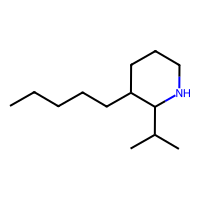
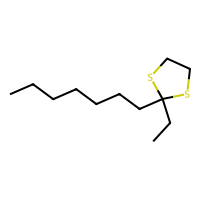
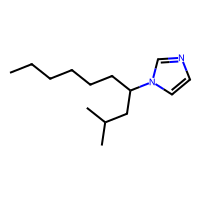
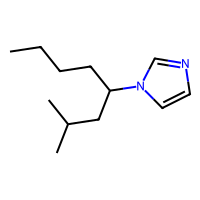
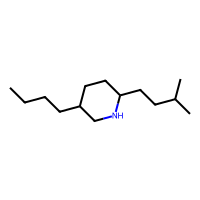
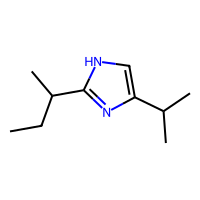
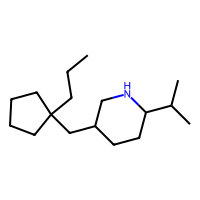
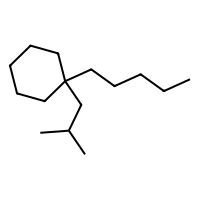
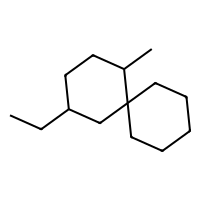
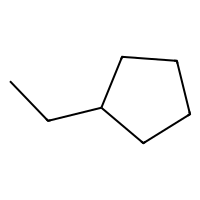

In [ ]:
display(df)

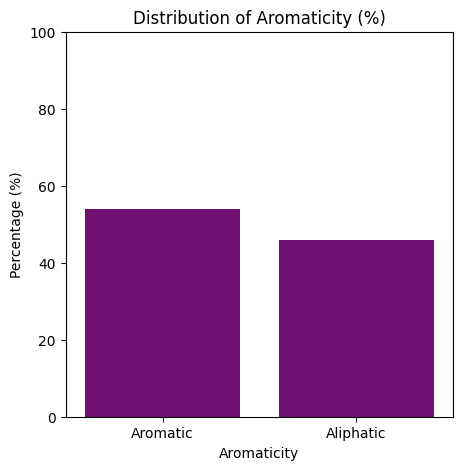

In [ ]:
aromaticity_counts = df['aromaticity'].value_counts()
total_molecules = len(df)
aromaticity_percentages = (aromaticity_counts / total_molecules) * 100

plt.figure(figsize=(5, 5))
sns.barplot(x=aromaticity_percentages.index, y=aromaticity_percentages.values, color='purple')
plt.title('Distribution of Aromaticity (%)')
plt.xlabel('Aromaticity')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100) # Ensure y-axis goes up to 100%
plt.show()

In [ ]:
os.chdir("/content/")

file_name = 'diesel seeds.txt'

In [ ]:
df2 = pd.read_csv(file_name, header=None)
df2.rename(columns={0: 'SMILES'}, inplace=True)

display(df2.head())

,SMILES
0,C1CCCC1
1,N1C=CC=C1
2,S1C=CC=C1
3,CCCCCC
4,CCCSCC


In [ ]:
# Creating molecular object from Smiles

PandasTools.AddMoleculeColumnToFrame(df2,'SMILES','mol')

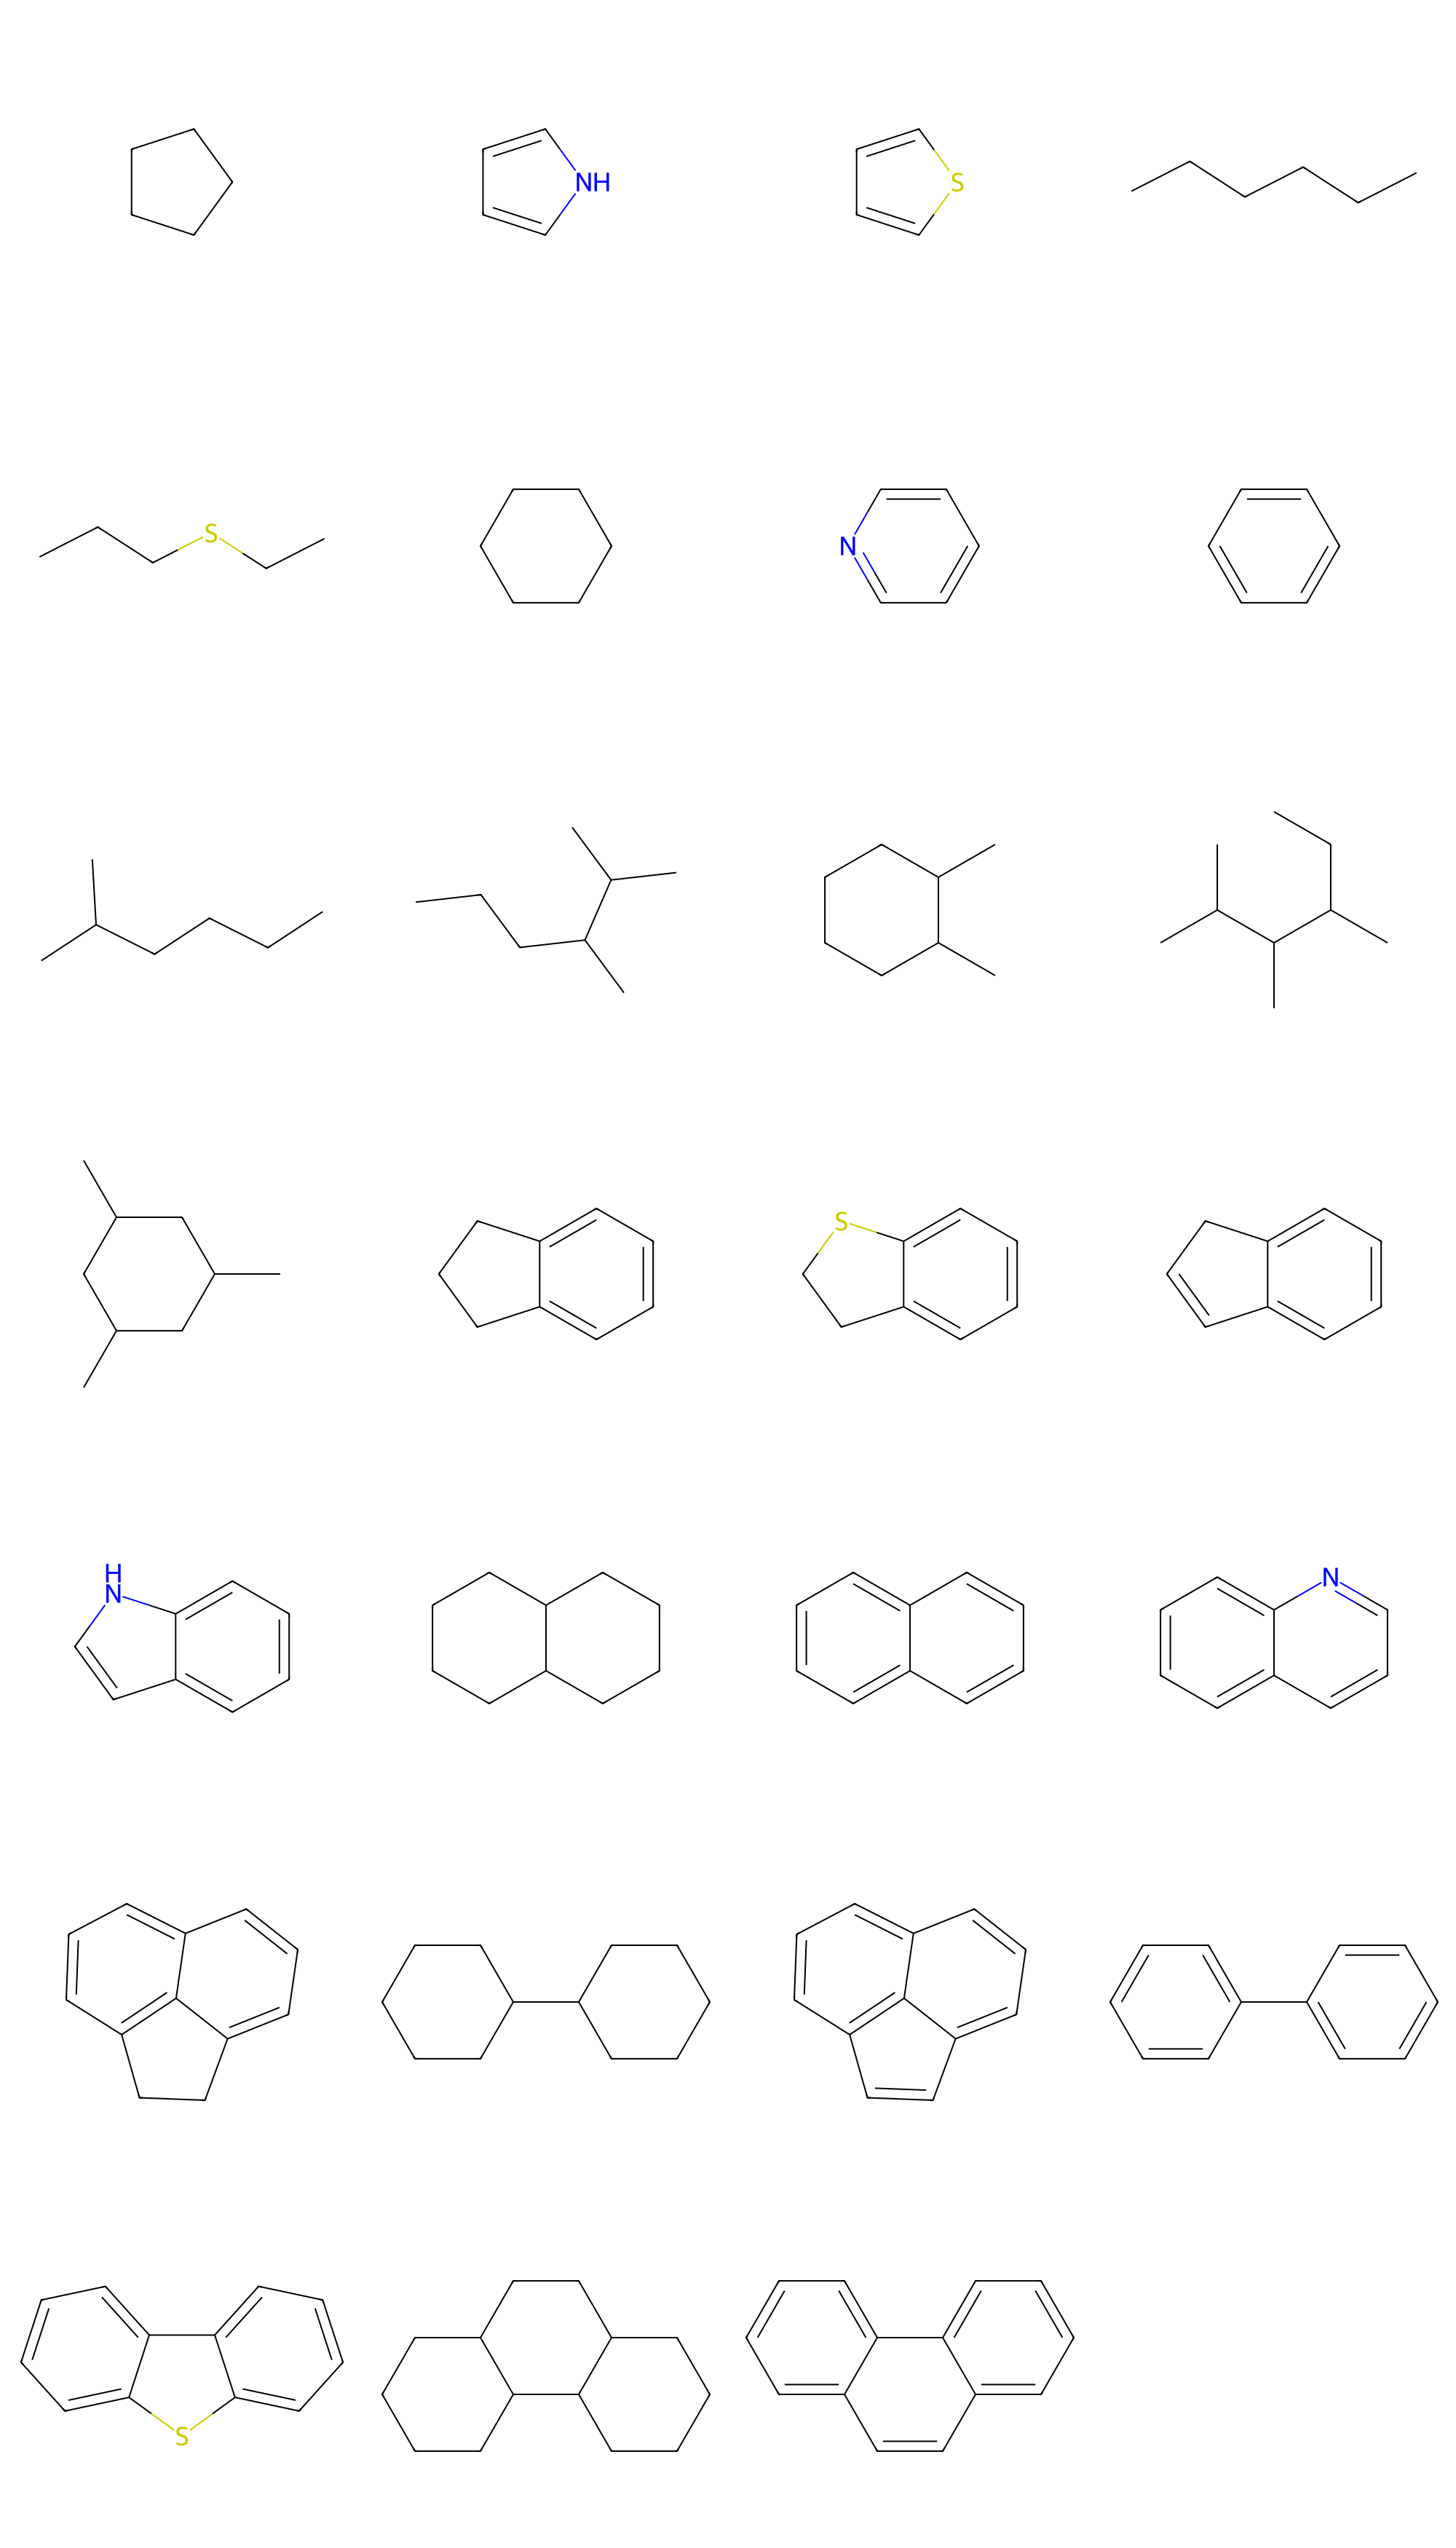

In [ ]:
Draw.MolsToGridImage(df2['mol'], molsPerRow=4, subImgSize=(500, 500))

## Identify cycloalkanes/naphthenics



In [ ]:
def is_cycloalkane(mol):
    """
    Checks if a molecule is a cycloalkane (contains at least one non-aromatic carbon ring).

    Args:
        mol: RDKit molecule object.

    Returns:
        True if the molecule contains at least one non-aromatic carbon ring,
        False otherwise. Returns None if the input is None.
    """
    if mol is None:
        return None

    if mol.GetRingInfo().NumRings() == 0:
        return False

    for ring in mol.GetRingInfo().AtomRings():
        is_carbon_ring = True
        is_aromatic_ring = False
        for atom_idx in ring:
            atom = mol.GetAtomWithIdx(atom_idx)
            if atom.GetAtomicNum() != 6:
                is_carbon_ring = False
                break
            if atom.GetIsAromatic():
                is_aromatic_ring = True

        if is_carbon_ring and not is_aromatic_ring:
            return True

    return False

In [ ]:
df['is_cycloalkane'] = df['mol'].apply(is_cycloalkane)
display(df.head())

,SMILES,mol,num_carbon_atoms,molecular_weight,aromaticity,is_cycloalkane
0,CCCCCC1CCCNC1C(C)C,<rdkit.Chem.rdchem.Mol object at 0x786b903a98c0>,13,197.366,Aliphatic,False
1,CCCCCCCC1(CC)SCCS1,<rdkit.Chem.rdchem.Mol object at 0x786b903aa810>,12,232.458,Aliphatic,False
2,CCCCCCC(CC(C)C)n1ccnc1,<rdkit.Chem.rdchem.Mol object at 0x786b903abdf0>,14,222.376,Aromatic,False
3,CCCCC(CC(C)C)n1ccnc1,<rdkit.Chem.rdchem.Mol object at 0x786b903aaab0>,12,194.322,Aromatic,False
4,CCCCC1CCC(CCC(C)C)NC1,<rdkit.Chem.rdchem.Mol object at 0x786b903ab4c0>,14,211.393,Aliphatic,False


## Analyze cycloalkanes within aromaticity groups

Analyze the distribution of cycloalkanes within the 'Aromatic' and 'Aliphatic' groups.


Group the dataframe by aromaticity and count the occurrences of cycloalkanes within each group.



In [ ]:
aliphatic_df = df[df['aromaticity'] == 'Aliphatic']
cycloalkane_distribution_aliphatic = aliphatic_df['is_cycloalkane'].value_counts()
display(cycloalkane_distribution_aliphatic)

,count
is_cycloalkane,
False,96
True,24


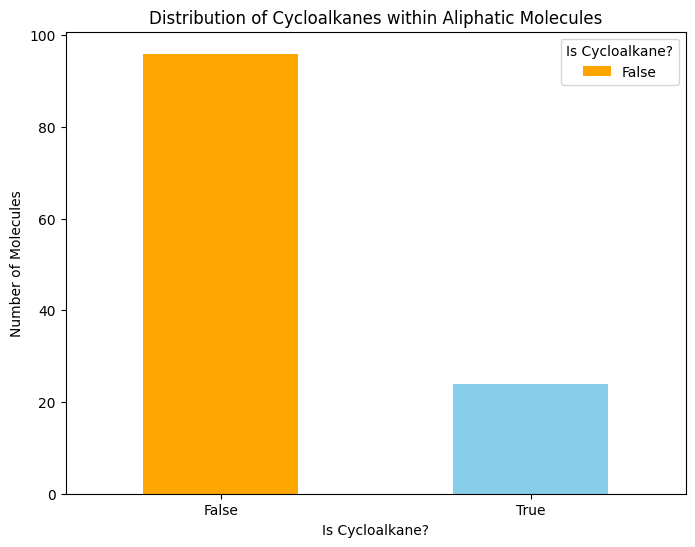

In [ ]:
aliphatic_df = df[df['aromaticity'] == 'Aliphatic']
cycloalkane_distribution_aliphatic = aliphatic_df['is_cycloalkane'].value_counts()

if not cycloalkane_distribution_aliphatic.empty:
    cycloalkane_distribution_aliphatic.plot(kind='bar', figsize=(8, 6), color=['orange', 'skyblue'])
    plt.title('Distribution of Cycloalkanes within Aliphatic Molecules')
    plt.xlabel('Is Cycloalkane?')
    plt.ylabel('Number of Molecules')
    plt.xticks(rotation=0)
    plt.legend(title='Is Cycloalkane?', labels=cycloalkane_distribution_aliphatic.index.tolist())
    plt.show()
else:
    print("No aliphatic molecules found in the dataset.")

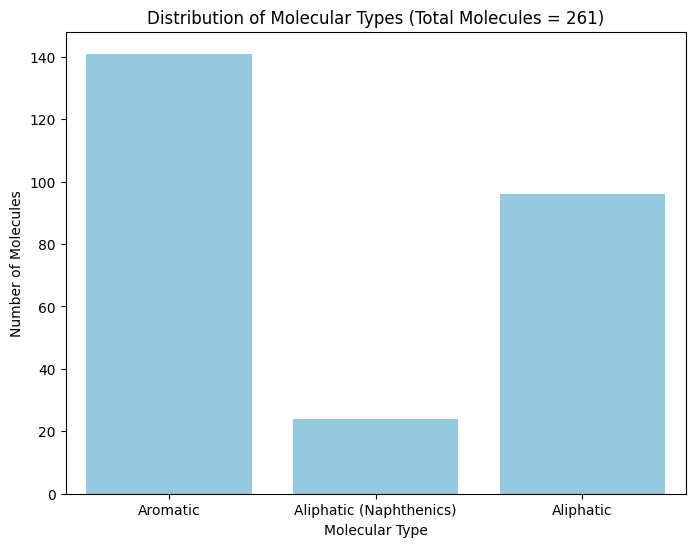

In [ ]:
# Calculate the counts for each category
aromatic_count = df[df['aromaticity'] == 'Aromatic'].shape[0]
aliphatic_cycloalkane_count = df[(df['aromaticity'] == 'Aliphatic') & (df['is_cycloalkane'] == True)].shape[0]
aliphatic_non_cycloalkane_count = df[(df['aromaticity'] == 'Aliphatic') & (df['is_cycloalkane'] == False)].shape[0]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': ['Aromatic', 'Aliphatic (Naphthenics)', 'Aliphatic'],
    'Count': [aromatic_count, aliphatic_cycloalkane_count, aliphatic_non_cycloalkane_count]
})

# Calculate percentages for stacking
total_count = df.shape[0]
plot_data['Percentage'] = (plot_data['Count'] / total_count) * 100

# Create the stacked bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=plot_data, color='skyblue')

plt.title('Distribution of Molecular Types (Total Molecules = {})'.format(total_count))
plt.xlabel('Molecular Type')
plt.ylabel('Number of Molecules')
plt.show()